## Изучение данных из файла

In [1]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
hypothesis= pd.read_csv('/datasets/hypothesis.csv', sep=',')
hypothesis.columns=hypothesis.columns.str.lower()

orders = pd.read_csv('/datasets/orders.csv', sep=',')
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

visitors = pd.read_csv('/datasets/visitors.csv', sep=',')
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [3]:
pd.options.display.max_colwidth =120
hypothesis.head(10)

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null datetime64[ns]
revenue          1197 non-null int64
group            1197 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [5]:
visitors.info()
visitors.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


##  Приоритизация гипотез.

In [6]:
hypothesis['ICE'] = (hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts']
ICE=hypothesis[['hypothesis','ICE']].sort_values(by='ICE', ascending=False)
ICE

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


In [7]:
hypothesis['RICE']=(hypothesis['impact']*hypothesis['confidence']*hypothesis['reach'])/hypothesis['efforts']
RICE =hypothesis[['hypothesis','RICE']].sort_values(by='RICE', ascending=False)
RICE

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


 ### Вывод
 При подсчете ICE топ-3 гипотизами стали 8,0 и 7ая. Однако, по RICE порядок поменялся на следующий: 7,2 и 0ая. Это произошло, т.к. добавился такой криетрий, как Reach , то есть насколько скольких пользователей затронет изменение, которое вы хотите внести. Очевидно, что гипотезы №7,2 и 0 можно затронут больше пользователей.

## Анализ A/B-теста

### Кумулятивные графики

In [8]:
orders_group=orders.groupby('visitorId')['group'].nunique().reset_index()
orders_group.columns=['visitorId','group']
orders_group_errors=orders_group[orders_group['group']>1]
orders_group_errors.count()

visitorId    58
group        58
dtype: int64

In [9]:
orders=orders.query('visitorId not in @orders_group_errors')

In [10]:
# массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 

# кумулятивная сумму средних чеков
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# кумулятивные по дням данные о посетителях 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# сводная таблицв по группе и дате
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

В данных нет дубликатов, но при этом 58 пользователей попали в две грруппы.

#### График кумулятивной выручки по группам

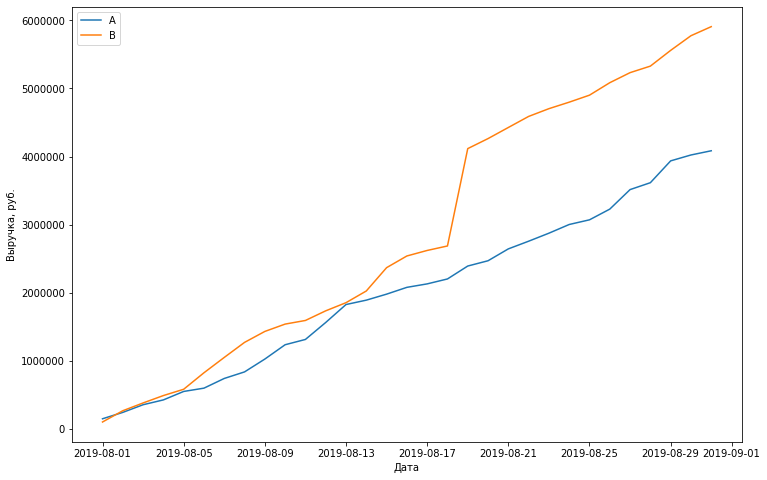

In [11]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(12, 8))

# график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.xlabel("Дата")
plt.ylabel("Выручка, руб.")
plt.legend()
plt.show()

Выручка почти равномерно увеличивается в течение всего теста. Заметен резкий рост в группе B 19.08.2019г. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. 

#### График кумулятивного среднего чека по группам

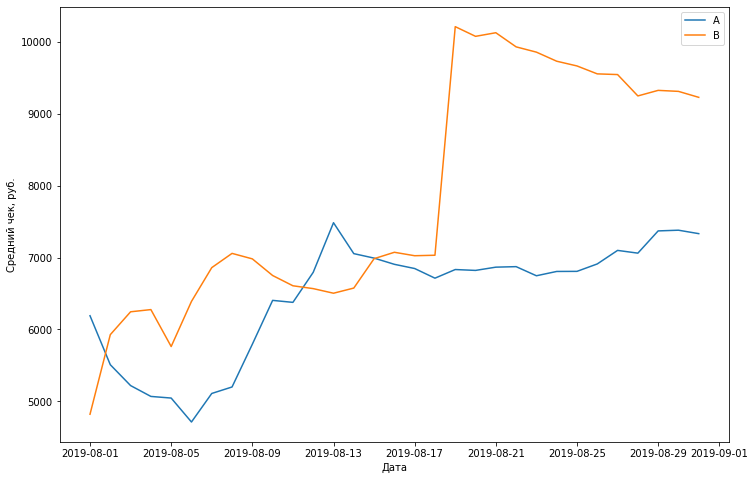

In [12]:
plt.figure(figsize=(12, 8))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.xlabel("Дата")
plt.ylabel("Средний чек, руб.")
plt.legend()
plt.show()

С 19.08.2019г.средний чек становится более равномерным, но все еще данные недостаточно стабильны. Заметно, что в группу D попал крупный заказ как раз в этот день.

#### График относительного изменения кумулятивного среднего чека группы B к группе A

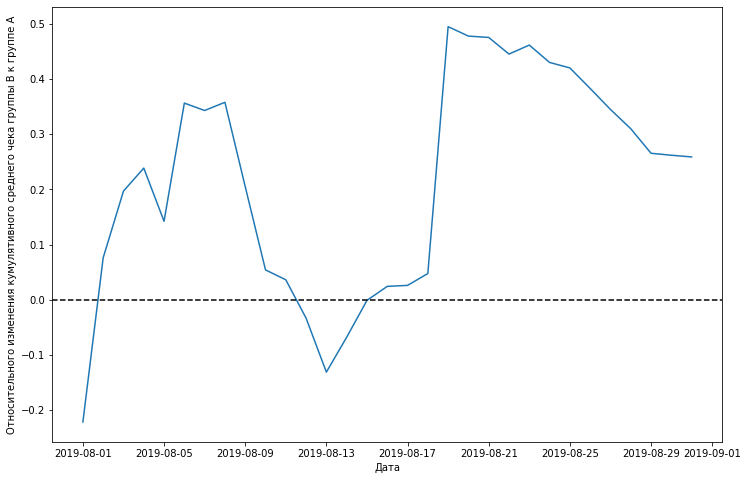

In [13]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(12, 8))

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.xlabel("Дата")
plt.ylabel("Относительного изменения кумулятивного среднего чека группы B к группе A")
plt.show()

График сильно скачет, есть вбросы и крупные заказы.

#### График кумулятивной конверсии по группам

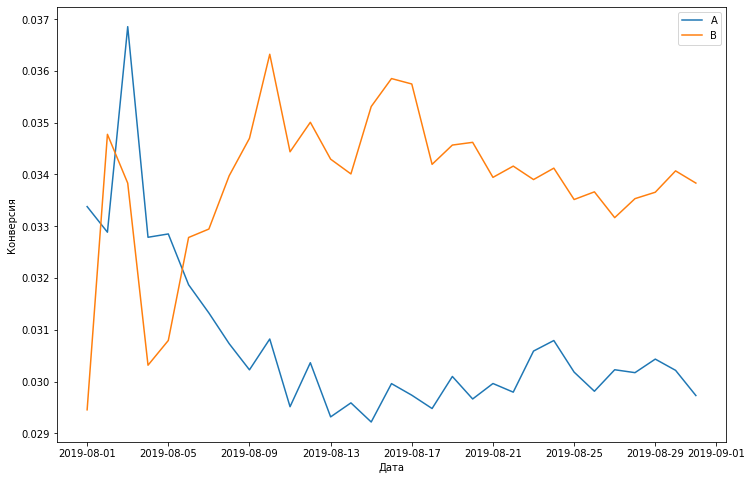

In [14]:
#  кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
#  данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

#  данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

#  графики
plt.figure(figsize=(12, 8))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

plt.xlabel("Дата")
plt.ylabel("Конверсия")
plt.legend()
plt.show()

Группы колебались до 06.08.2019г., после по конверсии группа В вырвалась вперед и лидировала все оставшееся время.

#### График относительного изменения кумулятивной конверсии группы B к группе A

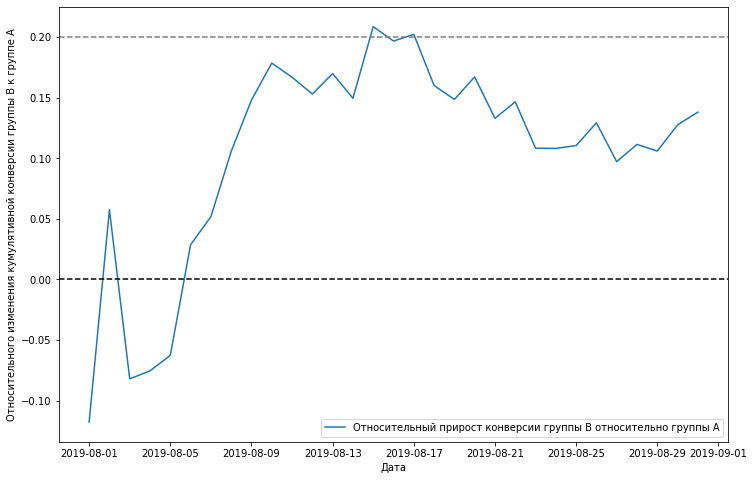

In [15]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
# графики
plt.figure(figsize=(12, 8))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()
# масштаб осей
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.xlabel("Дата")
plt.ylabel("Относительного изменения кумулятивной конверсии группы B к группе A")
plt.show()

В начале теста показатели группы В была как больше, так и меньше, но после 06.08.2019 конверсия вырвалась вперед и 15.08.2019 была больше на 20%. После этого наблюдался спад, который, однако, не опустился ниже 10%.

### Перцентили и точечные графики

#### Перцентили количества заказов на пользователя

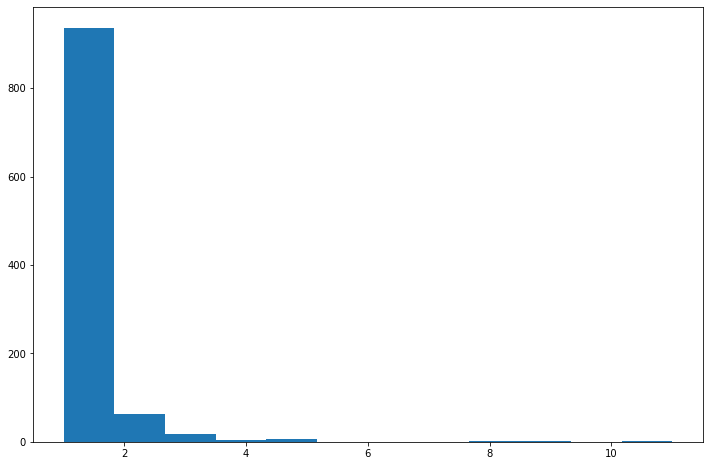

In [16]:

ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsers.columns = ['visitorId', 'orders']

plt.figure(figsize=(12, 8))
plt.hist(ordersByUsers['orders'], bins =12) 
plt.show()

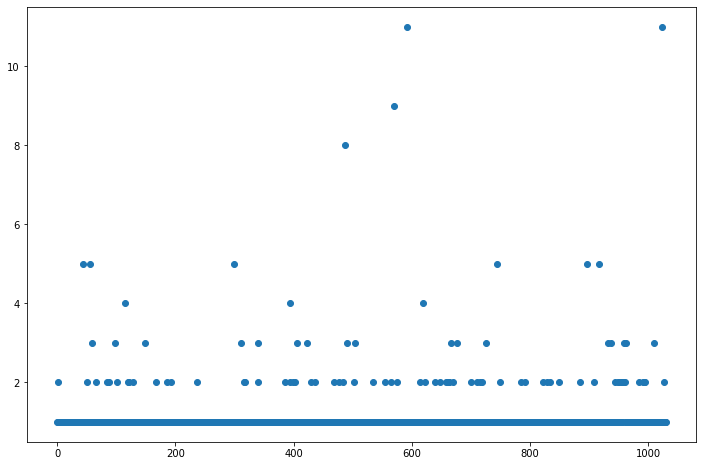

In [17]:
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.figure(figsize=(12, 8))
plt.scatter(x_values, ordersByUsers['orders'])
plt.show()

Большинство пользователей заказывали 1-3 раза.

In [18]:
# перцентили количества заказов на одного пользователя
np.percentile(ordersByUsers['orders'], [90, 95, 99])

array([1., 2., 4.])

90% пользователей делают по 1му заказу и меньше. Только 5% пользователей делало больше 2х заказов, и только 1% - больше 4х. Возьмем 3 заказа за нижнюю границу числа заказов.

#### Перцентили стоимости заказов

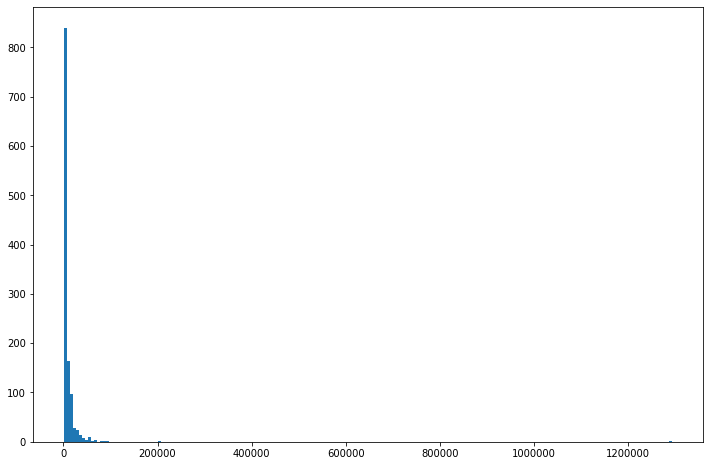

In [19]:
plt.figure(figsize=(12, 8))
plt.hist(orders['revenue'], bins=200)
plt.show()

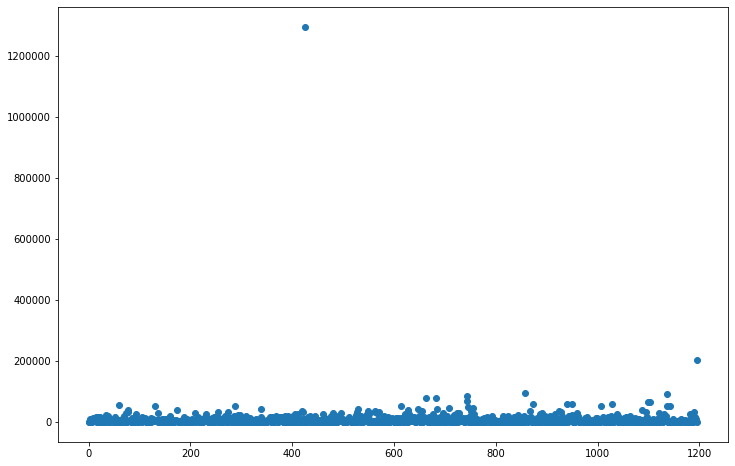

In [20]:
# разброс по сырым данным
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(12, 8))
plt.scatter(x_values, orders['revenue']) 
plt.show()

Есть только 1 заказ на 1,2 млн. и 1 на 200000 руб.

In [21]:
np.percentile(orders['revenue'], [90, 95, 99])

array([18168. , 28000. , 58233.2])

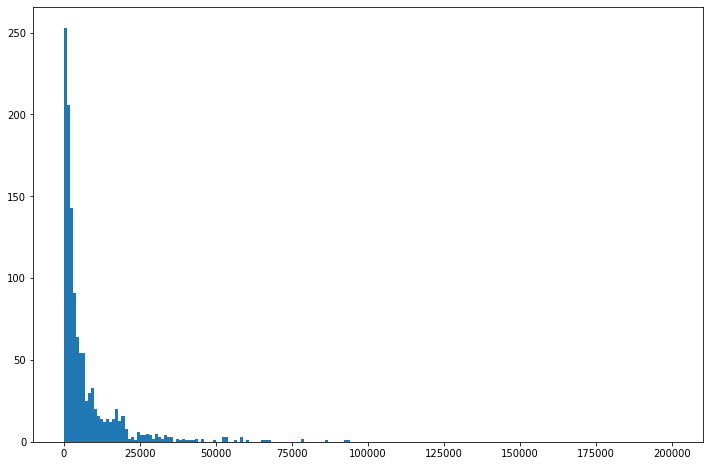

In [22]:
plt.figure(figsize=(12, 8))
plt.hist(orders['revenue'], bins=200, range=(0,200000))
plt.show()

У 10% пользователей стоимость заказа превышает 18168 руб., 5% покупают больше, чем на 28 тыс. руб. и только 1% - 58233 руб. Возьмем за нижнюю границу заказы до 30 тыс. руб.

### Анализ A/B-теста

 #### Анализ «сырых» даннных

In [23]:
#подготовки данных
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

display(data.head(5))

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [24]:
# пользователb, которые заказывали хотя бы 1 раз +  число совершённых заказов
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

In [25]:
# df, где пользователям из разных групп соответствуют количество заказов
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

##### Гипотизы
H0: Нет статистически значимых различий в конверсии между группами А и В.

H1: Есть статистически значимые различия в конверсии между группами А и В.

In [26]:
# критерий p-value (конверсия)
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
#  относительный прирост конверсии группы B
print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.008
0.138


Т.к. 0,008 меньше 0,05, то мы можем отвергнуть нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет. Конверися группы В больше на 13,8%.

##### Гипотизы
H0: Нет статистически значимых различий среднего чека между группами А и В.

H1: Есть статистически значимые различия среднего чека между группами А и В.

In [27]:
# критерий p-value (ср. чек)
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
# относительные различия в среднем чеке между группами
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.365
0.259


P-value (0,365) больше 0,05, это значит, что причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. При этом ср. чек группы В больше на 25,9%.

#### Анализ «очищенных» данных

In [28]:
# срезы пользователей по заказам
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 3]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 3]['visitorId'],
    ],
    axis=0,
)
# срез пользователй по сумме заказа
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitorId']
# объединение в таблицу
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape)

1099    148427295
18      199603092
928     204675465
23      237748145
684     358944393
Name: visitorId, dtype: int64
(57,)


##### Гипотизы
H0: Нет статистически значимых различий в конверсии между группами А и В.

H1: Есть статистически значимые различия в конверсии между группами А и В.

In [29]:
# подготовка выборки количества заказов по пользователям по группам теста:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
# критерий p-value (конверсия)
print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
#  относительный прирост конверсии группы B
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.009
0.148


По отчищенным данным результат остается тем же: 0,009 < 0,005, можем отвергнуть гипотезу о том, что статистически значимых различий в конверсии между группами нет. Конверися группы В стала еще больше по сравнению с конверсии группы А (14,8%).

##### Гипотизы
H0: Нет статистически значимых различий среднего чека между группами А и В.

H1: Есть статистически значимые различия среднего чека между группами А и В.

In [30]:
# критерий p-value (ср. чек)
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

# относительные различия в среднем чеке между группами
print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.479
-0.020


P-value увеличился еще сильнее, но при этом ср. чек группы В стал меньше чека группы В на 2%.

### Вывод 
 - Есть статистически значимое различие по конверсии между группами и по «сырым», и по данным после фильтрации аномалий;
 - Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
 - График различия конверсии между группами сообщает, что результаты группы B лучше группы A и имеется тенденция к улучшению.
 - График кумулятивной конверсии по группам показаывает колебания  в обеих группах.
 - График различия среднего чека говорит о том, что результаты группы B улучшаются день ото дня и сейчас почти на 30% лучше. При этом данные недостаточно стабильны.
 
Исходя из обнаруженных фактов, тест следует остановить и признать неуспешным.